<a href="https://colab.research.google.com/github/Diego875621/Data_Science/blob/main/Forecasting_health_insurance_costs/Forecasting_health_insurance_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecasting health insurance costs**

There are a wide variety of companies in the health insurance sector, which can have basic or advanced coverage, with geographical or national limitations. As a result, the prices of plans, whether basic or not, can highly fluctuate.

These varying prices depend on several factors relating to the client and the environment, such as age, annual income, location, individual or group plan, current health state, and user of alcohol and/or cigarettes, among many others.

Choosing a health insurance plan is not an easy task. There are basic plans and more complex or "premium" plans. Your decision will influence your insurance cost and how much you will have to pay out-of-pocket when you need medical assistance.

In the US, even with the Affordable Care Act (ACA) and the provision of subsidies for low-income families according to the federal poverty level, there are still many people who cannot afford health insurance.

According to the Kaiser Family Foundation, a 21-year-old adult has a monthly cost averaging 313-450 dollars a month, depending on the level of the plan. And the older the individual, the higher the amount they have to pay. For example, a 60-year-old could have monthly costs of 850-1225 dollars.

Based on this information, this analysis aims to predict health insurance costs based on the patient characteristics available in this dataset by using a Data Science model which can be found at [Kaggle](https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction).

To do this, we will first begin with the Exploratory Data Analysis (EDA) and Data Visualization. Next, regression models (models that predict values, in this case, the insurance costs values) will be built and tested.

Auto Machine Learning will also be tested by using the Pycaret Library.



In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Dataframe
data = 'https://raw.githubusercontent.com/Diego875621/Data_Science/main/Health%20Insurance%20Cost%20Prediction/insurance.csv'
df = pd.read_csv(data)

**Dictionary of variables**

- age: Age of the primary contractor
- sex: Sex of contractor - female or male
- bmi: Body mass index (BMI)
- children: Number of children included in health insurance
- smoker: Smoker or not Smoker
- region: Geographical region of the beneficiary in the United States (US)
- charges: Medical costs paid by health insurance

Based on this dataset, we're going to analyze the cost of health insurance based on patient characteristics: the patient's age, whether or not they smoke, in which region they live, their body mass index and the number of children they have, and how these variables can affect the final cost of insurance.

# **Exploratory Data Analysis (EDA)**

Let's start checking our initial information

In [ ]:
# Dataframe head
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Dataset Shape
print('Dataset Shape:', df.shape)

print('\n')

# Sum of Missing values
print('Sum of Missing values:')
df.isnull().sum()

Dataset Shape: (1338, 7)


Sum of Missing values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- The dataset has 7 columns and no missing values, that's a good start.



In [ ]:
# dataset Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- There are categorical features: `sex`, `smoker` and `region` that need to be transformed into numeric ones. One-hot encoder can be used for the `children` and `region` features.

Now let's check the features distribution and its statistical summary to extract patterns.


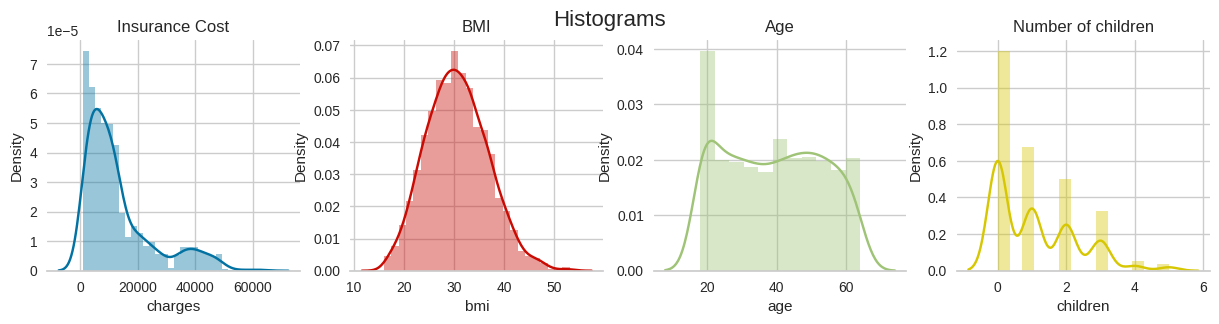

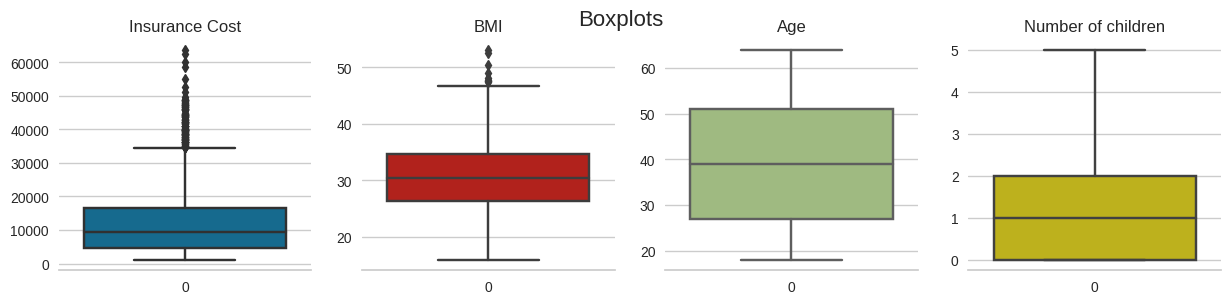

In [ ]:
# Histograms

f, axs = plt.subplots(1, 4, figsize=(15,3))

f.suptitle('Histograms', fontsize=16)

sns.axes_style("darkgrid")
sns.despine(left=True)

sns.distplot(df.charges, ax=axs[0])
axs[0].set_title('Insurance Cost')

sns.distplot(df.bmi, ax=axs[1], color='r')
axs[1].set_title('BMI')

sns.distplot(df.age, ax=axs[2], color='g')
axs[2].set_title('Age')

sns.distplot(df.children, ax=axs[3], color='y')
axs[3].set_title('Number of children')

plt.show();

print('\n\n')

# Boxplots

f, axs = plt.subplots(1, 4, figsize=(15,3))
f.suptitle('Boxplots', fontsize=16)

sns.axes_style("darkgrid")
sns.despine(left=True)

sns.boxplot(df.charges, ax=axs[0])
axs[0].set_title('Insurance Cost')

sns.boxplot(df.bmi, ax=axs[1], color='r')
axs[1].set_title('BMI')

sns.boxplot(df.age, ax=axs[2], color='g')
axs[2].set_title('Age')

sns.boxplot(df.children, ax=axs[3], color='y')
axs[3].set_title('Number of children')

plt.show();

- `charges` is the target feature (that is, the feature we will predict) and most users have costs ranging from 4740 (25% of data) to 16639 (75% of data). There are several outliers (values above the upper limit).

- `bmi` - Most users have a BMI ranging from 26 (25% of data) to 34 (75% of data) and people with a BMI greater tends to be overweight. Seems to follow a normal distribution (a continuous distribution), with a mean of 30. Has some outliers.

- `age` - The ages vary from 20 years (most frequent) to 60, with a mean of 39 years.

- `children` - Most people only have 1 or 2 children or none (most frequent), and a smaller group has more than 2 children.

In [ ]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Next chart will compare costs between individuals below or greater than 30 BMI.

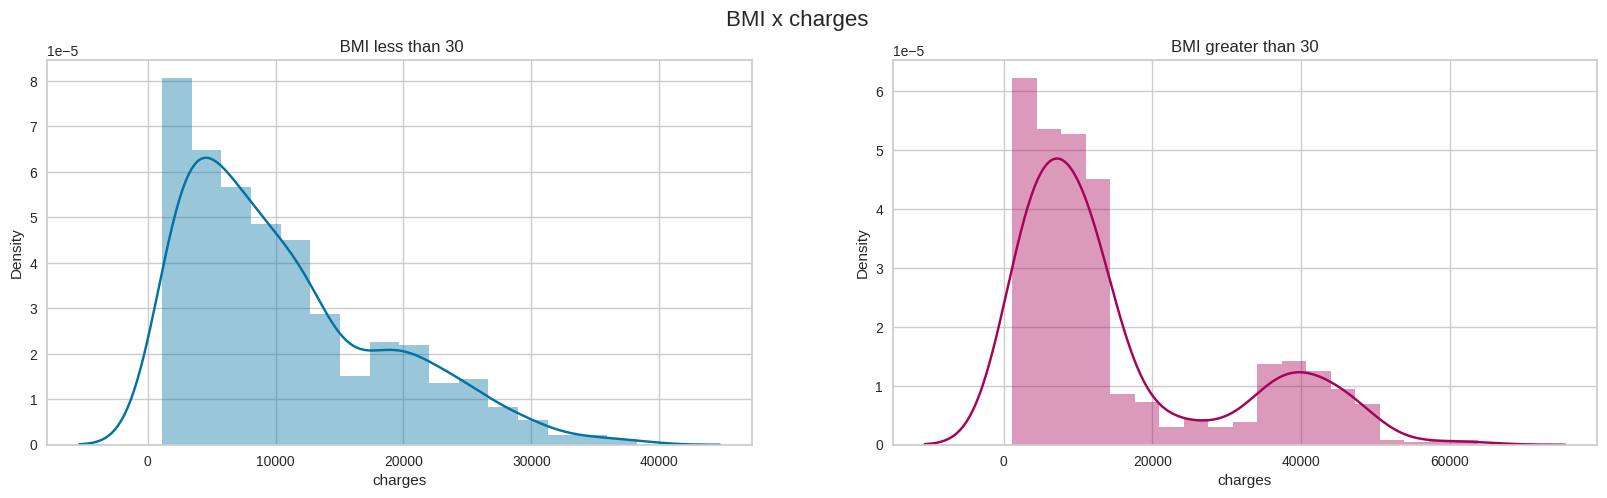




maximum value of charges:


,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [ ]:
# Comparison - bmi x charges
f, axs = plt.subplots(1, 2, figsize=(20,5))

f.suptitle('BMI x charges', fontsize=16)

sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b', ax=axs[0]);
axs[0].set_title(' BMI less than 30')

sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm', ax=axs[1]);
axs[1].set_title('BMI greater than 30')

plt.show()

print('\n\n')

# maximum value of 'charges'
print('maximum value of charges:')
df[df['charges'] == df['charges'].max()]

- The average body mass index (`bmi`) was 30, and a value equal to or greater than 30 means obesity levels.

According to the charts, people at these levels spent more on treatment. The person who had the highest health costs is female, from the southeast region, BMI = 47.41 and is a smoker.

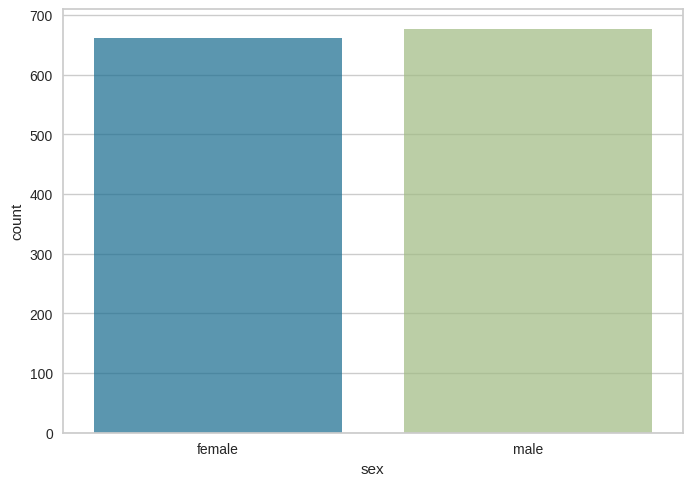

In [ ]:
# Distribuição - 'sex'
sns.countplot(data = df, x='sex', alpha = 0.7);

The dataset is balanced about the `sex` feature

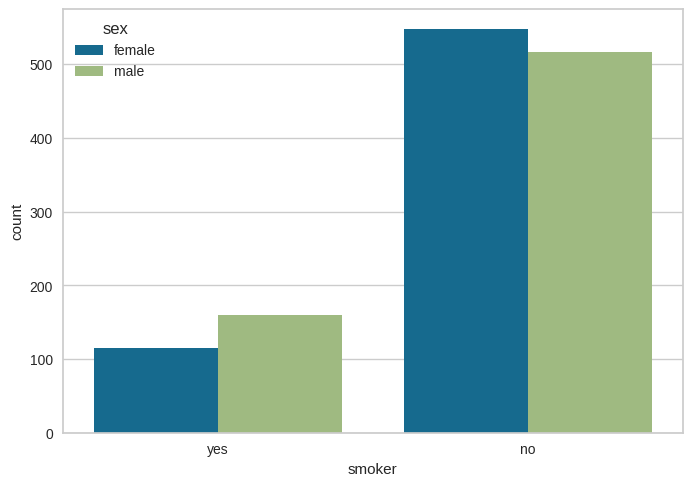

In [ ]:
# Distribuição - 'sex' x 'smoker'
sns.countplot(x = 'smoker', hue = 'sex', data = df);

The sex ratio of smokers and non-smokers is reasonably balanced as well, though most smokers tend to be male.

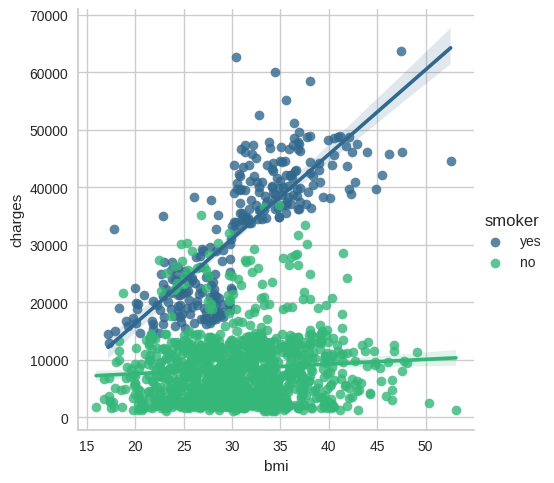

In [ ]:
# Regression plot - 'bmi' x 'charges'
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df, palette='viridis');

Clearly, smokers have more insurance costs than non-smokers, with an increasing pattern.

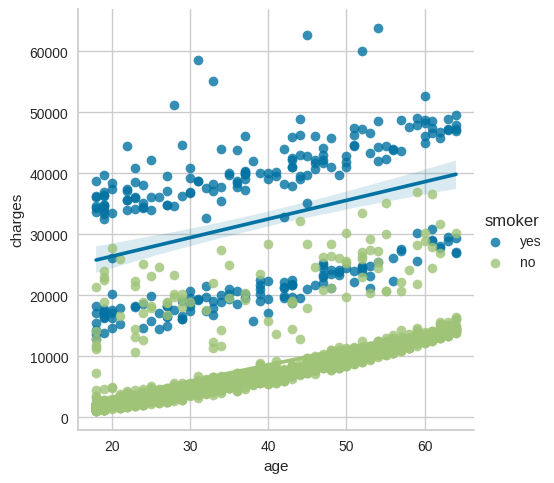

In [ ]:
# Regression plot - 'age' x 'charges'
sns.lmplot(x='age', y='charges', hue='smoker', data=df);

Costs tend to increase with age, which makes sense because as we get older, we tend to be more susceptible to illness. However this pattern is not that significant for smokers, having higher costs anyway.

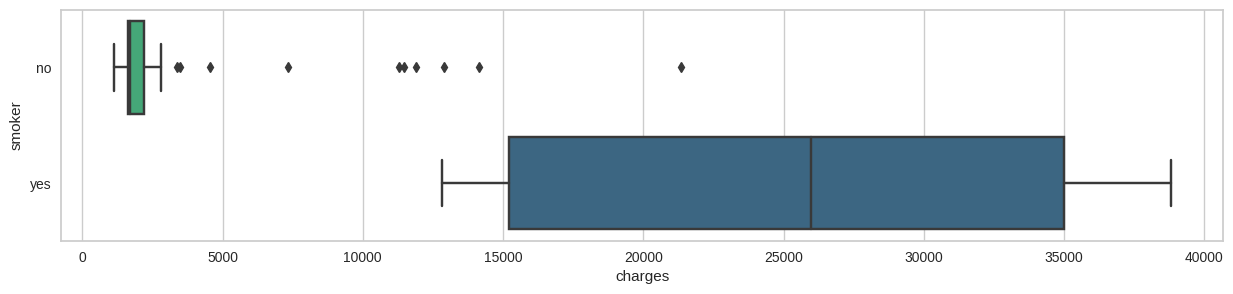

In [ ]:
# Boxplot smoker x charges
f, ax = plt.subplots(figsize=(15,3))
sns.boxplot(y = 'smoker', x = 'charges', data = df[(df.age == 18)], orient='h', ax=ax, palette='viridis_r');

- This boxplot confirms that most smokers have higher insurance costs, even young (age = 18) individuals.

- There are some outliers between young non-smokers, as a hypothesis, this could be because of possible accidents or rare diseases

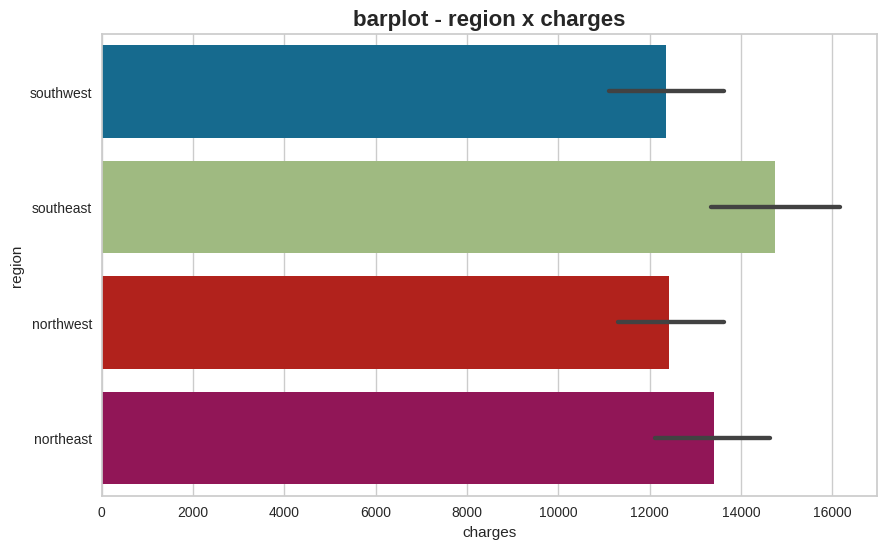

region
southeast    5363689.8
northeast    4343668.6
northwest    4035712.0
southwest    4012754.6
Name: charges, dtype: float64


In [ ]:
# barplot - 'region' x 'charges'
f, ax = plt.subplots(figsize = (10,6))
ax.set_title('barplot - region x charges', fontsize=16, fontweight='bold');
sns.barplot(y = 'region', x = 'charges', data = df, ax=ax)

plt.show()

# charges_by_region list
charges_by_region = round(df['charges'].groupby(df.region).sum().sort_values(ascending = False), 1)
print(charges_by_region)

- Regions of the USA that have the highest health expenditures: Southeast > Northeast > Northwest > Southwest

# **Preprocessing**

Here we will first copy the original dataframe and then perform Feature Enginnering, which will transform the categorical variables into numerical ones through LabelEncoding and One-Hot-Encoding.

In [ ]:
# dataframe copy
df1 = df.copy()

In [ ]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df1.sex.drop_duplicates())
df1.sex = le.transform(df1.sex)

le.fit(df1.smoker.drop_duplicates())
df1.smoker = le.transform(df1.smoker)

# One-Hot-Encoding
df1 = pd.get_dummies(df1, columns=['region', 'children'], prefix_sep='_')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   smoker            1338 non-null   int64  
 4   charges           1338 non-null   float64
 5   region_northeast  1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
 9   children_0        1338 non-null   uint8  
 10  children_1        1338 non-null   uint8  
 11  children_2        1338 non-null   uint8  
 12  children_3        1338 non-null   uint8  
 13  children_4        1338 non-null   uint8  
 14  children_5        1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 65.5 KB


Now all features are numerical

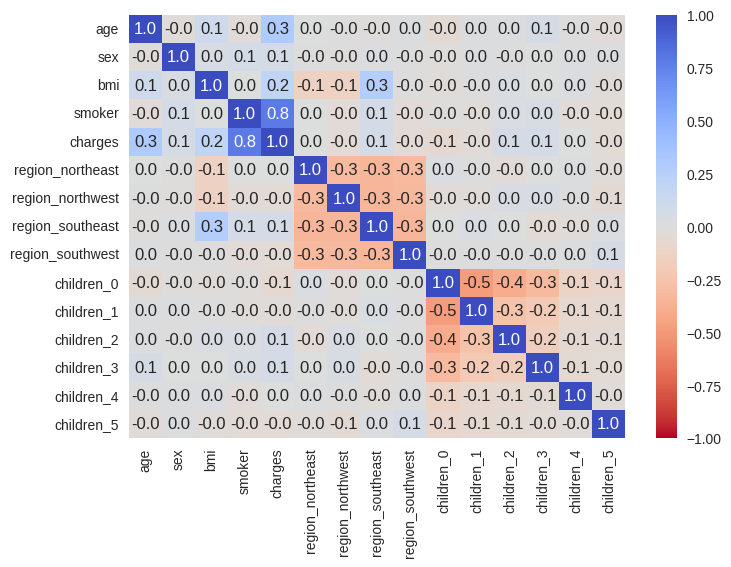

In [ ]:
# Correlation
corr = df1.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', annot=True, vmin= -1, vmax=1, fmt='.1f')
plt.show();

There is a high correlation between `charges` and `smoker`. As expected, smokers tend to suffer more from health problems.

Although in these data there is a low correlation of `charges` with `bmi`, an increase would also be expected, as obese people usually have a high BMI and also tend to have more health problems.

## **Outliers**

We saw that there are some features with a high number of outliers, so in this part, we will mitigate the majority by capping them to 99% or 1% about the quartile upper and lower limit.

In [ ]:
import pandas as pd

def cap_outliers(df, lower_cap=0.01, upper_cap=0.99):
    """
    Cap outliers in DataFrame columns to specified lower and upper percentiles.

    Parameters:
    - df: DataFrame
        The input DataFrame containing numerical columns.
    - lower_cap: float, optional (default=0.01)
        The lower percentile to cap outliers to.
    - upper_cap: float, optional (default=0.99)
        The upper percentile to cap outliers to.

    Returns:
    - DataFrame
        A new DataFrame with outliers capped to the specified percentiles.
    """
    capped_df = df.copy()

    for column in capped_df.columns:
        lower_bound = capped_df[column].quantile(lower_cap)
        upper_bound = capped_df[column].quantile(upper_cap)

        capped_df[column] = capped_df[column].clip(lower=lower_bound, upper=upper_bound)

    return capped_df

# Example usage:
# Assuming 'your_dataframe' is your actual DataFrame
# capped_dataframe = cap_outliers(your_dataframe)

capped_df = cap_outliers(df1)

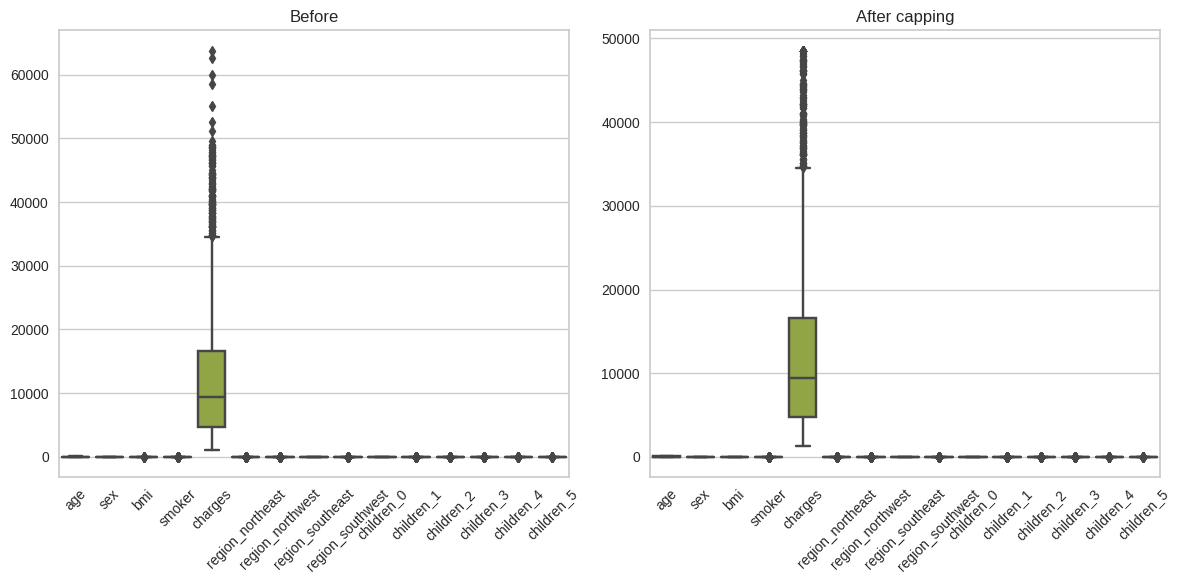

In [ ]:
# Create a figure with two subplots in a single row
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first boxplot (Before)
sns.boxplot(data=df1, ax=axs[0])
axs[0].set_title('Before')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot the second boxplot (After capping)
sns.boxplot(data=capped_df, ax=axs[1])
axs[1].set_title('After capping')
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()

Now the main outliers were capped.

# **Clustering**

Using unsupervised learning - clustering - we can group and visualize features based on the target variable. Below is a Kmeans cluster  of `bmi` in relation to `charges`.

To determine the number of clusters (k) we will use the KElbowVisualizer library, which uses the "Elbow Method" to help us visualize the best k.

The Elbow Method finds the average distance of the sum of squares between the cluster centroid and the data observations. As the number of clusters increases, the average sum of squares decreases. Basically, as the number of clusters increases, the distance between the data points and the centroids also decreases. The rule of thumb is that whenever we see the "elbow" point (intersection of the lines) we should consider this the ideal number of clusters.


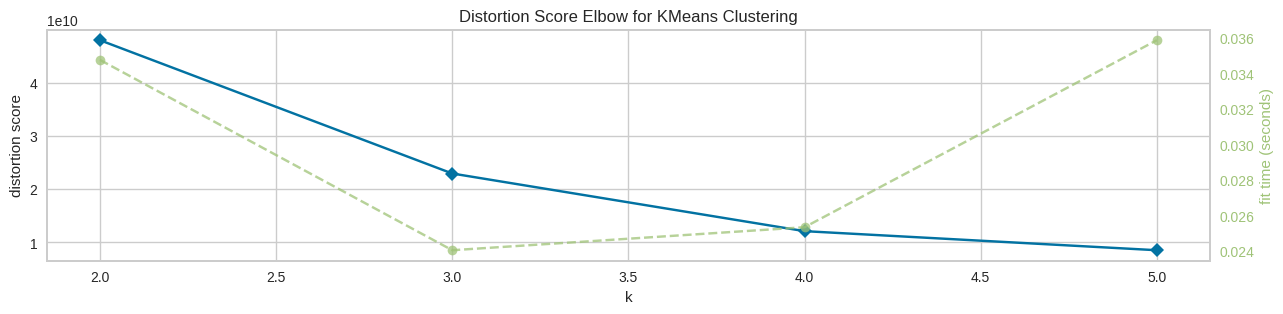

''

In [ ]:
# KElbowVisualizer to find best k
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(15,3))

C = df1[['charges','bmi']]

kmeans = KMeans()
best_k = KElbowVisualizer(kmeans, k=(2,6))

best_k.fit(C)
best_k.poof();''

3 seems to be a good number of K for clustering. But let's confirm using a more trusty tool - `SilhouetteVisualizer`. Silhouette analysis can be used to evaluate the density and separation between clusters.

This tool computes a score by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

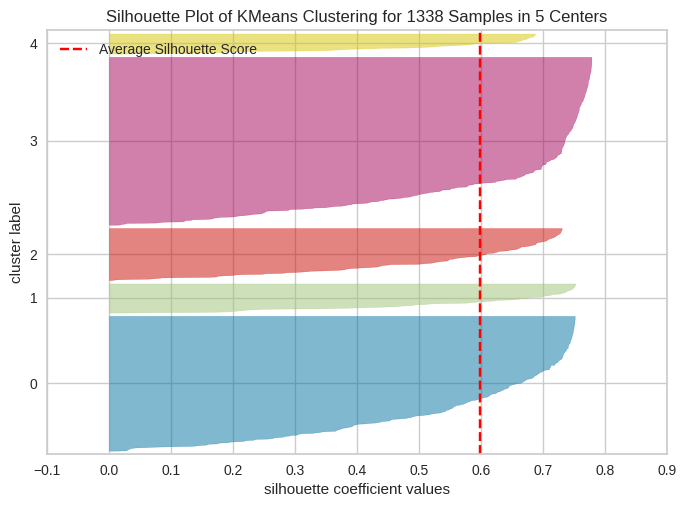

In [ ]:
# SilhouetteVisualizer to find best k
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(C)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

Yes, k=3 is really the best number because it contains a homogeneous and long silhouette.

In [ ]:
# Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(C)

print('Cluster Centroids')
print(kmeans.cluster_centers_, '\n')

print('Clusters Labels')
print(kmeans.labels_)

Cluster Centroids
[[1.88976443e+04 2.88763542e+01]
 [6.43014804e+03 3.04800394e+01]
 [4.07613086e+04 3.48454321e+01]] 

Clusters Labels
[0 1 1 ... 1 1 0]


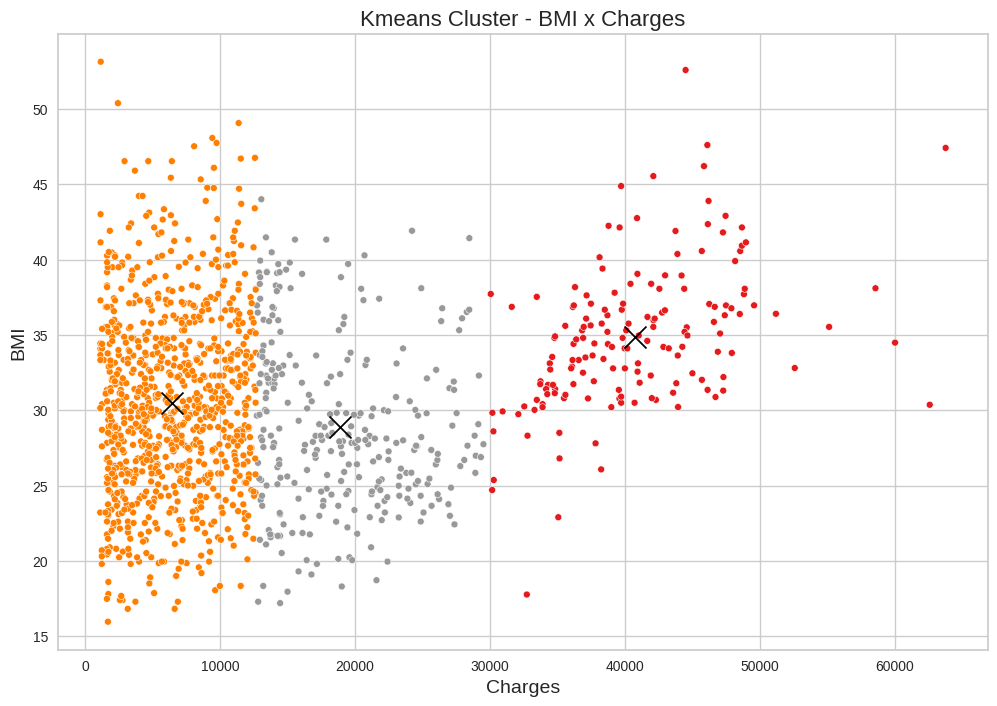

In [ ]:
# Cluster Visualization
fig = plt.figure(figsize=(12,8))

sns.scatterplot(x= C.values[:,0], y= C.values[:,1], c = kmeans.labels_, cmap="Set1_r", s=25)
sns.scatterplot(x= kmeans.cluster_centers_[:,0], y= kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)

# Adding axis labels
plt.xlabel("Charges", fontsize=14)
plt.ylabel("BMI", fontsize=14)

plt.title("Kmeans Cluster - BMI x Charges", fontsize=16)
plt.show()

- The densest group is the gray one, showing the lowests values of `charges` followed by the red group, and then by the yellow group, in a ascending pattern of `charges`

- It's important to note that, in this dataset, not all people with a BMI over 30 had a high level of expenditure. For example, there are people with a BMI > 30 in all 3 clusters. Therefore, the correlation `bmi` x `charges` does not necessarily imply causality in this dataset.

# **Model selection**

As we are dealing with continuous values, regression will be more useful. Unlike classification, which tries to predict probabilities, regression is used for predicting values.

To assess the efficiency of a regression model, we will be using the (**MAE**) Mean Absolute Error - The lower the error rate, the better.

Let's begin by splitting the data into training and test and then visualize the score of a few regression models.

In [ ]:
# Models packages
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Train x test split
X = capped_df.drop('charges', axis = 1)
y = capped_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
# Function to evaluate several regressors and
# returns the MAE of regressors

def evaluate_regressors(regressors, X_train, y_train, scoring='neg_mean_absolute_error'):
    results = []
    for key, regressor in regressors.items():
        regressor.fit(X_train, y_train)
        training_score = -cross_val_score(regressor, X_train, y_train, scoring=scoring)
        results.append({
            'Regressor': regressor.__class__.__name__,
            'MAE': round(training_score.mean(), 2)
        })

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='MAE', ascending=True)  # Sort by 'MAE'
    return results_df

# Regressors
regressors = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'XGBoost': XGBRegressor(),
    'GBR': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(),
}

print('Cross-Validation:\n')
results_df = evaluate_regressors(regressors, X_train, y_train)
results_df

Cross-Validation:



,Regressor,MAE
4,GradientBoostingRegressor,2537.45
6,RandomForestRegressor,2676.89
3,XGBRegressor,3118.53
1,Lasso,4194.73
0,LinearRegression,4196.19
2,Ridge,4206.63
5,KNeighborsRegressor,8072.23


The `GradientBoostingRegressor` with default hyperparameters was the best model because it returned the lowest MAE value.

Now let's try with standardized data to see if we get better scores.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_standardized = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_standardized = scaler.transform(X_test)

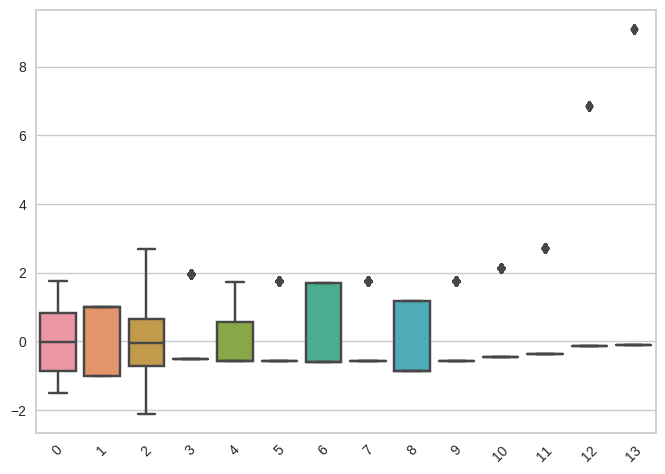

In [ ]:
# Box plot of standardized data
sns.boxplot(data=X_train_standardized)
plt.xticks(rotation=45)
plt.show()

Now the data is standardized.

In [ ]:
print('Cross-Validation standardized :\n')
results_df_standardized = evaluate_regressors(regressors, X_train_standardized, y_train)
results_df_standardized

Cross-Validation standardized :



,Regressor,MAE
4,GradientBoostingRegressor,2541.88
6,RandomForestRegressor,2708.35
3,XGBRegressor,3118.53
5,KNeighborsRegressor,4055.92
0,LinearRegression,4175.35
1,Lasso,4195.60
2,Ridge,4197.31


However, the score of the main regressor didn't improve with the standardized data, it actually performed a little worse, so let's stay with the original values.

## **GradientBoostingRegressor model**

In [ ]:
# Create a GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model to your training data
gb_model.fit(X_train, y_train)

gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

In [ ]:
# MAE
MAE_gb_model = mean_absolute_error(y_test, y_pred)
print(f'GradientBoostingRegressor MAE: {MAE_gb_model:.3f}')

GradientBoostingRegressor MAE: 2450.702


## **Hyperparameter Tunning with Optuna**

We have a great result! Now let's try to improve it by tuning the model. `Optuna` will be used to tune hyperparameters because is quick and efficient to do this, and better, is an automatic hyperparameter optimization.

In [ ]:
# Install Optuna
!pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00


In [ ]:
### OPTUNA
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def objective(trial):
    # Define hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 2, 3, 5),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
    }

    # Create the GradientBoostingRegressor model
    gb_reg = GradientBoostingRegressor(**params)

    # Train the model
    gb_reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gb_reg.predict(X_test)

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    return mae

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
print('')
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X, y)
y_pred_tuned = best_model.predict(X_test)

# MAE tunned
print('')
MAE_gb_tunned = mean_absolute_error(y_test, y_pred_tuned)
print(f'tunned GradientBoostingRegressor MAE: {MAE_gb_tunned:.3f}')

[I 2024-01-02 17:29:14,674] A new study created in memory with name: no-name-b88f5407-7f9f-4df6-a98e-8b5a642a579b
[I 2024-01-02 17:29:14,842] Trial 0 finished with value: 2483.2989185981223 and parameters: {'n_estimators': 139, 'learning_rate': 0.09235914671994784, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 2483.2989185981223.
[I 2024-01-02 17:29:14,974] Trial 1 finished with value: 2520.8219336597836 and parameters: {'n_estimators': 114, 'learning_rate': 0.09898626623139786, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 2483.2989185981223.
[I 2024-01-02 17:29:15,081] Trial 2 finished with value: 2653.045174723219 and parameters: {'n_estimators': 87, 'learning_rate': 0.04886306489090377, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 2483.2989185981223.
[I 2024-01-02 17:29:15,264] Trial 3 finished with value: 2628.5879595279275 and parameters: {'n_


Best Hyperparameters: {'n_estimators': 139, 'learning_rate': 0.08870065046660293, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 1}

tunned GradientBoostingRegressor MAE: 2208.031


Tunning the model did improve it to a MAE of 2208.031!

Let's see which features were more important to achieve this score.


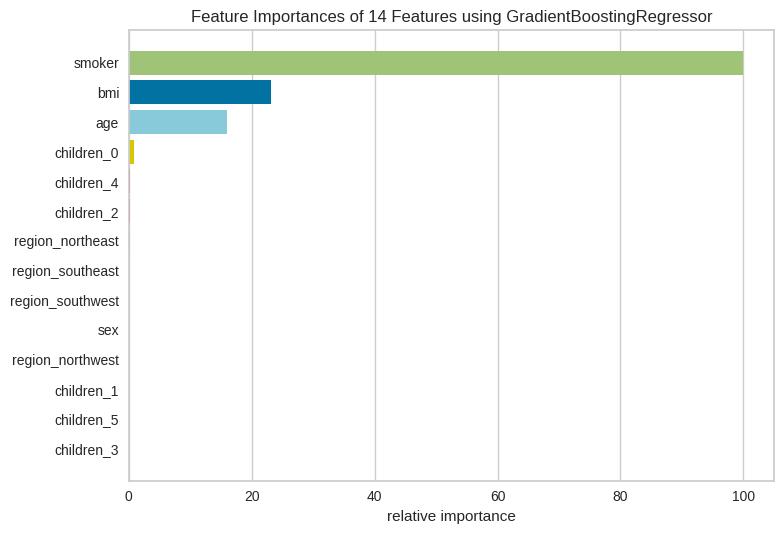

In [ ]:
from yellowbrick.model_selection import FeatureImportances

# Use Yellowbrick's FeatureImportances visualizer
viz = FeatureImportances(best_model, labels=X_train.columns)
viz.fit(X_train, y_train)
viz.show();

The most important features were `smoker`, `bmi` and `age`.

# **Pycaret**

The Pycaret library is based on Auto-Machine-Learning. In other words, most processes, such as encoding and tuning, are automated. First the module will be installed, to then use the setup on the dataset, comparison between the models and choice of the best model, tuning of the model's hyper-parameters, evaluation of the metrics and finalization.

In [ ]:
# # Instaling pycaret
# !pip install pycaret -q

In [ ]:
# # Disable log messages
# import logging, sys
# logging.disable(sys.maxsize)

In [ ]:
# # import pycaret regression and init setup
# from pycaret.regression import *
# s = setup(data = df, target = 'charges', session_id = 42)

,Description,Value
0,Session id,42
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [ ]:
# # Train test split
# test = df.sample(frac = 0.25)
# train = df.drop(test.index)

In [ ]:
# # Comparing models
# best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2610.8759,21791637.6860,4627.3067,0.8421,0.4277,0.3013,0.2410
lightgbm,Light Gradient Boosting Machine,2963.2674,25082834.4653,4972.9142,0.8191,0.5386,0.3615,0.8470
rf,Random Forest Regressor,2887.6516,25570645.6614,5029.7075,0.8169,0.4655,0.3337,0.4910
ada,AdaBoost Regressor,4165.9408,27820422.5003,5247.6376,0.8000,0.6048,0.6815,0.1920
et,Extra Trees Regressor,2872.2588,28630344.2699,5336.1453,0.7952,0.4755,0.3195,0.5420
xgboost,Extreme Gradient Boosting,3262.7884,29851613.6000,5422.5865,0.7877,0.5799,0.4169,0.2350
ridge,Ridge Regression,4304.7348,38463769.8694,6185.4628,0.7247,0.6275,0.4370,0.1410
br,Bayesian Ridge,4299.5177,38464444.6848,6185.4300,0.7246,0.6188,0.4360,0.1710
llar,Lasso Least Angle Regression,4293.2896,38463709.9170,6185.2745,0.7246,0.6126,0.4349,0.0880
lar,Least Angle Regression,4293.1733,38465193.7000,6185.3822,0.7246,0.6125,0.4348,0.0910


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# # Create model
# gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2911.3787,28949994.2164,5380.5199,0.8179,0.5135,0.3898
1,2205.0917,11838144.3902,3440.6605,0.9210,0.3508,0.2824
2,2474.1581,15821959.3546,3977.6827,0.9142,0.3508,0.2551
3,2041.3641,16507373.2527,4062.9267,0.8936,0.4010,0.2816
4,3131.8932,29684472.1076,5448.3458,0.7137,0.4517,0.2795
5,2331.4499,19704799.8911,4439.0089,0.8463,0.4161,0.2765
6,2693.6698,22532620.4467,4746.8537,0.7920,0.4414,0.2910
7,2876.4478,26718583.2773,5169.0022,0.8286,0.4233,0.3204
8,2667.8996,22868744.5792,4782.1276,0.8549,0.4531,0.3228


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# # Tunning
# tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3140.6134,29865367.4856,5464.9215,0.8122,0.5214,0.3819
1,2378.7258,12685923.9305,3561.7305,0.9153,0.3822,0.3214
2,2850.2893,19874368.5772,4458.0678,0.8922,0.3686,0.2842
3,2584.8495,21148879.2117,4598.7911,0.8636,0.5032,0.3702
4,3352.4865,31862975.8405,5644.7299,0.6927,0.5089,0.3330
5,2576.6517,20764436.9035,4556.8012,0.8380,0.4116,0.2899
6,2822.9646,23789662.9942,4877.4648,0.7804,0.4625,0.3246
7,3070.7266,29065315.5398,5391.2258,0.8136,0.4652,0.3412
8,2786.8049,26740202.8641,5171.0930,0.8303,0.4862,0.3356


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# # Model parameters
# final_gbr.get_params()

{'memory': Memory(location=None),
 'steps': [('numerical_imputer',
   TransformerWrapper(include=['age', 'bmi', 'children'],
                      transformer=SimpleImputer())),
  ('categorical_imputer',
   TransformerWrapper(include=['sex', 'smoker', 'region'],
                      transformer=SimpleImputer(strategy='most_frequent'))),
  ('ordinal_encoding',
   TransformerWrapper(include=['sex', 'smoker'],
                      transformer=OrdinalEncoder(cols=['sex', 'smoker'],
                                                 handle_missing='return_nan',
                                                 mapping=[{'col': 'sex',
                                                           'data_type': dtype('O'),
                                                           'mapping': female    0
   male      1
   NaN      -1
   dtype: int64},
                                                          {'col': 'smoker',
                                                           'data_type': dt

In [ ]:
# # Model Pipeline
# final_gbr

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],
                                    transfor...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=42))])

In [ ]:
# # Evaluate model
# evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# # Final model
# final_gbr = finalize_model(tuned_gbr)

In [ ]:
# # Predict on test data
# test_predict = predict_model(final_gbr, data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2023.4691,13862347.7888,3723.2174,0.9083,0.3456,0.2414


In [ ]:
#save_model(final_gbr, 'GBR_regressor_pycaret')

Regression in Pycaret:

- The best model was GradientBoostRegressor (GBR)

- Mean Absolute Error (MAE) = 2023.4691

- The most important features for the model were `smoker`, `age` and `bmi`


# **Conclusion**

**Exploratory analysis**:

Smokers tend to have higher health insurance costs. Same with patients with a BMI over 30, including young patients. The southeast was the most expensive region.


**Model**:

GradientBoostRegressor (GBR) performed best and got the best score (MAE = 2208.031). The features most important to the model were `smoker`, `bmi` e `age`. Pycaret managed to improve the results of the previous model even further (MAE = 2023.4691).

**Applications**

Based on this work, it could be created health insurance cost calculators, for example, can be created together with other technologies to deploy the model.

This way, the model can help make better decisions, for example, predicting the best health insurance plan that best suits the individual.

Also, it should be emphasized that health insurance costs are highly variable and several factors can influence, the people who benefit:

 - are smokers or not,
 - the age of the beneficiaries
 - the type and place of work,
 - the location of the beneficiary,
 - the family's annual income,
 - federal/state/municipal laws,
 - the number of children, and
 - the type of coverage of the plans.